# TSA_HW07 Q5

Consider the famous time series data “co2” (monthly carbon dioxide through 11 years in Alert, Canada).



In [1]:
library(TSA)
require(grDevices)

Warning message:
"package 'TSA' was built under R version 4.2.2"

Attaching package: 'TSA'


The following objects are masked from 'package:stats':

    acf, arima


The following object is masked from 'package:utils':

    tar




In [2]:
data(co2)

(a) Fit a deterministic regression model in terms of months and time. Are the regression coefficients significant? What is the adjusted R-squared? (Note that the month variable should be treated as categorical and transformed into 11 dummy variables.)

In [3]:
month = season(co2)
trend=time(co2)

In [4]:
model = lm(co2 ~ month + trend)
summary(model)


Call:
lm(formula = co2 ~ month + trend)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.73874 -0.59689 -0.06947  0.54086  2.15539 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -3290.5412    44.1790 -74.482  < 2e-16 ***
monthFebruary      0.6682     0.3424   1.952 0.053320 .  
monthMarch         0.9637     0.3424   2.815 0.005715 ** 
monthApril         1.2311     0.3424   3.595 0.000473 ***
monthMay           1.5275     0.3424   4.460 1.87e-05 ***
monthJune         -0.6761     0.3425  -1.974 0.050696 .  
monthJuly         -7.2851     0.3426 -21.267  < 2e-16 ***
monthAugust      -13.4414     0.3426 -39.232  < 2e-16 ***
monthSeptember   -12.8205     0.3427 -37.411  < 2e-16 ***
monthOctober      -8.2604     0.3428 -24.099  < 2e-16 ***
monthNovember     -3.9277     0.3429 -11.455  < 2e-16 ***
monthDecember     -1.3367     0.3430  -3.897 0.000161 ***
trend              1.8321     0.0221  82.899  < 2e-16 ***
---
Signif. codes:  0 '***' 

All of the regression coefficients are statistically significant except for the seasonal effects for February and June.

Adjusted R-squared = 0.9892

(b) Identify, estimate the SARIMA model for the co2 level.


SARIMA $(0,1,1)\times(0,1,1)_{12}$ model

In [5]:
sarima.co2 = arima(co2, order = c(0,1,1), seasonal = list(order = c(0,1,1),period = 12))

In [6]:
sarima.co2


Call:
arima(x = co2, order = c(0, 1, 1), seasonal = list(order = c(0, 1, 1), period = 12))

Coefficients:
          ma1     sma1
      -0.5792  -0.8206
s.e.   0.0791   0.1137

sigma^2 estimated as 0.5446:  log likelihood = -139.54,  aic = 283.08

https://datascienceplus.com/time-series-analysis-using-arima-model-in-r/

In [17]:

library('lmtest')

Warning message:
"package 'lmtest' was built under R version 4.2.2"
Loading required package: zoo

Warning message:
"package 'zoo' was built under R version 4.2.2"

Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




In [18]:
coeftest(sarima.co2)


z test of coefficients:

      Estimate Std. Error z value  Pr(>|z|)    
ma1  -0.579182   0.079075 -7.3245 2.399e-13 ***
sma1 -0.820611   0.113731 -7.2154 5.379e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [19]:
confint(sarima.co2)

,2.5 %,97.5 %
ma1,-0.734166,-0.4241973
sma1,-1.043519,-0.5977019


This gives the maximum likelihood estimates and their standard errors for the ARIMA $(0,1,1)×(0,1,1)_{12}$ model for CO2 levels. The coefficient estimates are all highly significant.

(c) Compare the two models above, what do you observe?

## Diagnostic Checking
### Randomness

In [7]:
options(repr.plot.width=10, repr.plot.height=5) # modify the plot size


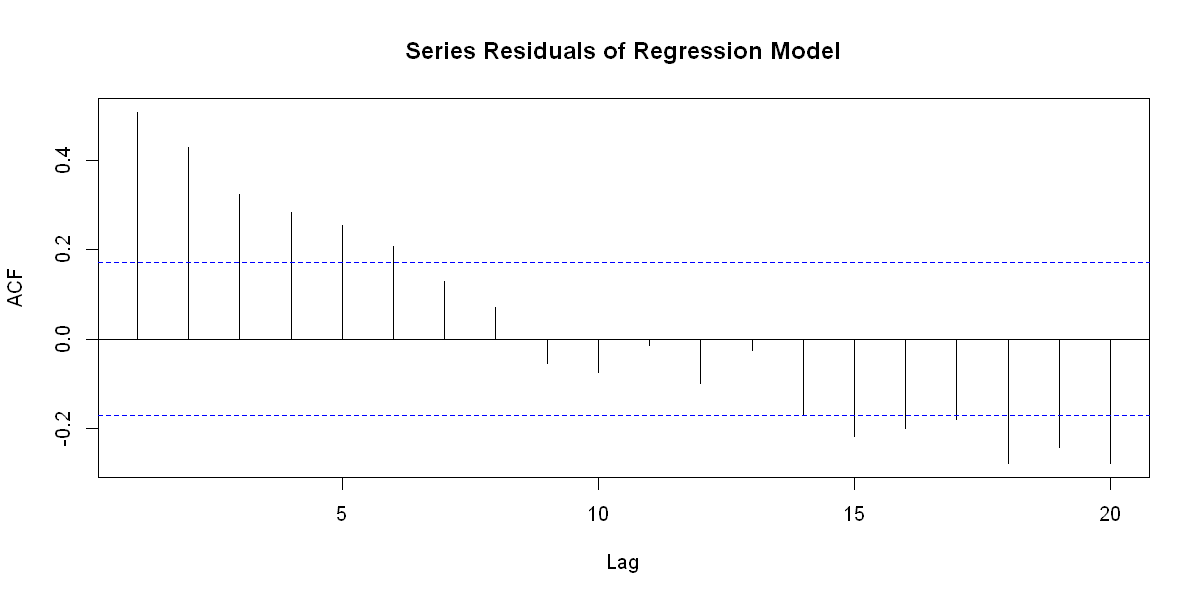

In [8]:
acf(residuals(model), main="Series Residuals of Regression Model",lag.max = 20)

In [9]:
LB.test(model)


	Box-Ljung test

data:  residuals from  model
X-squared = 106.09, df = 12, p-value < 2.2e-16


In [10]:
LB.test(model, lag = 24)


	Box-Ljung test

data:  residuals from  model
X-squared = 192.24, df = 24, p-value < 2.2e-16


Reject the randomness of the residuals based on the regression model.

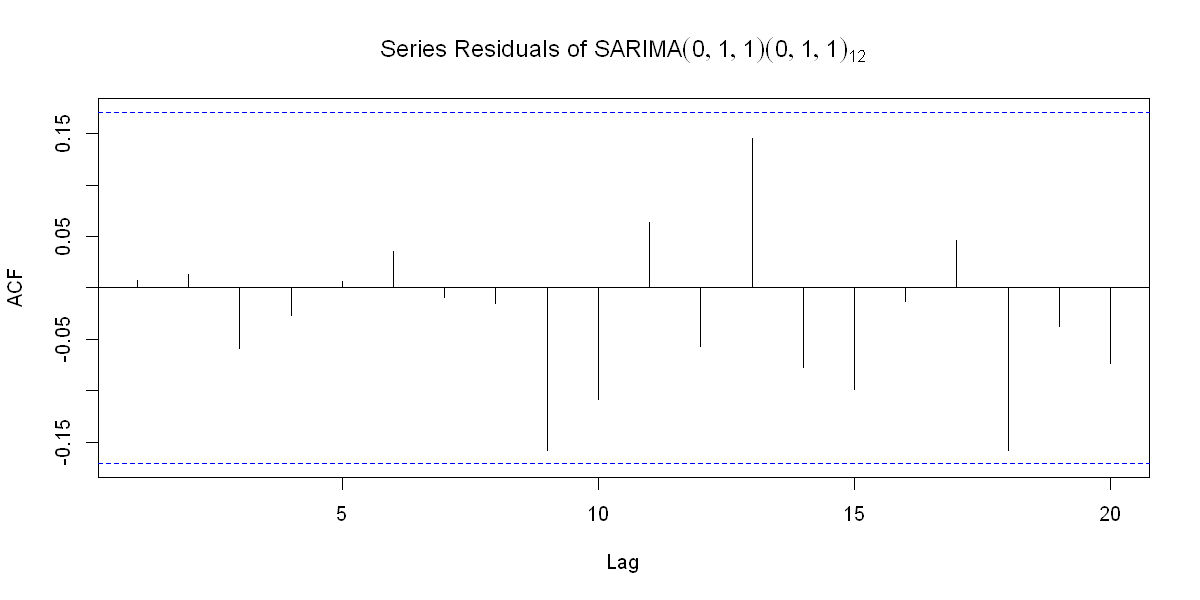

In [11]:
acf(as.vector(residuals(sarima.co2)), main=expression(paste("Series Residuals of ",list( SARIMA (0,1,1) (0,1,1)[12]))),
 lag.max = 20
 )

In [12]:
LB.test(sarima.co2, lag = 24)


	Box-Ljung test

data:  residuals from  sarima.co2
X-squared = 25.587, df = 22, p-value = 0.2698


In [13]:
LB.test(sarima.co2)


	Box-Ljung test

data:  residuals from  sarima.co2
X-squared = 7.051, df = 10, p-value = 0.7206


Not reject the randomness of the residuals based on the SARIMA $(0,1,1)\times(0,1,1)_{12}$ model. The model  has captured the dependence in the time series.

Conclusion: The SARIMA $(0,1,1)\times(0,1,1)_{12}$ model is much better than the linear model. 